<a href="https://colab.research.google.com/github/JeanFirmino/APLICACAO-DE-MACHINE-LEARNING-PARA-O-INDICE-IBOVESPA/blob/main/APLICA%C3%87%C3%83O_DE_MACHINE_LEARNING_PARA_O_INDICE_IBOVESPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Foi utilizado a série histórica do indice ibovespa com 10 anos de história.
# Buscou-se como meta analizar a variação do indice ibovespa e a variação do USD/BRL
# Caso se confirme alguma relação, será aplicado o algoritmo de árvore de decisão para uma possivel previsão

### Analise para os dados IBOVESPA e USD/BRL



Importando bibliotecas

In [ ]:
# Iniciando as bibliotecas usadas para montar um sistema de aprendizado de máquina, conhecido como "árvore de decisão",
# Tem como objetivo criar um "raciocínio" das informações de saída e entrada para que possa fornecer um método no qual seja possivel prever informações.
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Os dados foram coletados do site Br investing, teve como critério principal coletar os dados diários entre 01/01/2010 até 01/12/2020
# Para o estudo foi IMPORTANTE manipular os dados coletados, primeiro foi mantido a coluna preço e as datas em seu lugar de inicio,
# mas para os demais dados foi selecionado e "rebaixado", para que os dados do dia ficassem a par com as informações de abertura, max, min, vol e var 
# do pregão anterior, ou seja, temos como premissa que o valor de fechamento de hoje será influenciado pelos dados de abertura, max, min, vol e var tanto do indice quanto 
# do preço da moeda no pregão anterior
origem = 'drive/My Drive/Artigo_dados_do_ibovespa/ibovFINAL.csv'
planilha = pd.read_csv(origem, sep=',')
plt.style.use('classic')

In [ ]:
planilha.head()

,ano,meses,dia,fechamentoibov,aberturaibov,maxibov,minibov,volibov,aberturausd,maxusd,minusd,fechamentousd,volusd
0,2010.0,1.0,4.0,70045.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010.0,1.0,5.0,70240.0,68587.0,70081.0,68587.0,1655400.0,1.6930,1.7412,1.6723,1.7190,0.0
2,2010.0,1.0,6.0,70729.0,70046.0,70595.0,69928.0,1984200.0,1.6713,1.7370,1.6713,1.7370,0.0
3,2010.0,1.0,7.0,70451.0,70237.0,70937.0,70016.0,2243600.0,1.6798,1.7359,1.6798,1.7315,0.0
4,2010.0,1.0,8.0,70263.0,70723.0,70723.0,70045.0,1555000.0,1.7242,1.7472,1.6805,1.7389,0.0


In [ ]:
dados = planilha.dropna(axis=0, how='any') # Remover qualquer linhas que possua NaN (células vazias)

In [ ]:
dados['ano'] = dados['ano'].astype(int)
dados['meses'] = dados['meses'].astype(int)
dados['dia'] = dados['dia'].astype(int) # para converter as datas para inteiro

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
dados.head()

,ano,meses,dia,fechamentoibov,aberturaibov,maxibov,minibov,volibov,aberturausd,maxusd,minusd,fechamentousd,volusd
1,2010,1,5,70240.0,68587.0,70081.0,68587.0,1655400.0,1.6930,1.7412,1.6723,1.7190,0.0
2,2010,1,6,70729.0,70046.0,70595.0,69928.0,1984200.0,1.6713,1.7370,1.6713,1.7370,0.0
3,2010,1,7,70451.0,70237.0,70937.0,70016.0,2243600.0,1.6798,1.7359,1.6798,1.7315,0.0
4,2010,1,8,70263.0,70723.0,70723.0,70045.0,1555000.0,1.7242,1.7472,1.6805,1.7389,0.0
5,2010,1,11,70433.0,70455.0,70766.0,70158.0,1634400.0,1.6954,1.7492,1.6954,1.7320,0.0


In [ ]:
dados.shape #Número de linhas e colunas no dataframe

(2677, 13)

In [ ]:
dados.info() # Informações base do dataframe (se alguma coluna numérica estiver em object, por favor converta )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2677 entries, 1 to 2707
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ano             2677 non-null   int64  
 1   meses           2677 non-null   int64  
 2   dia             2677 non-null   int64  
 3   fechamentoibov  2677 non-null   float64
 4   aberturaibov    2677 non-null   float64
 5   maxibov         2677 non-null   float64
 6   minibov         2677 non-null   float64
 7   volibov         2677 non-null   float64
 8   aberturausd     2677 non-null   float64
 9   maxusd          2677 non-null   float64
 10  minusd          2677 non-null   float64
 11  fechamentousd   2677 non-null   float64
 12  volusd          2677 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 292.8 KB


In [ ]:
dados["fechamentoibov"].value_counts().sort_index()

37497.0     1
37645.0     1
37717.0     1
37937.0     1
38031.0     1
           ..
118391.0    1
118478.0    1
118573.0    1
118862.0    1
119528.0    1
Name: fechamentoibov, Length: 2589, dtype: int64

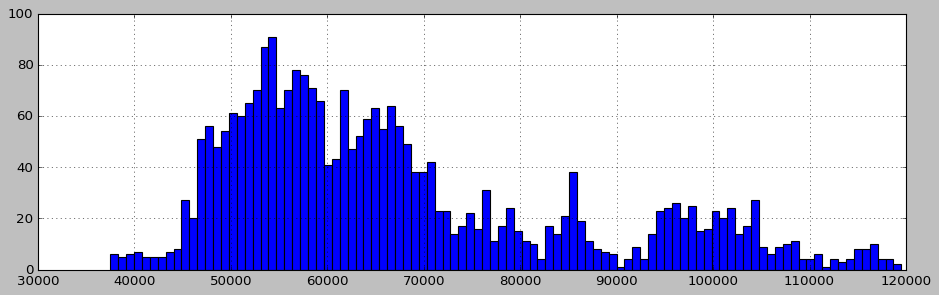

In [ ]:
dados["fechamentoibov"].hist(bins = 100, figsize = (14,4))

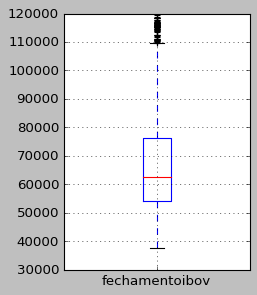

In [ ]:
dados.boxplot(figsize=(3, 4),column=['fechamentoibov'])

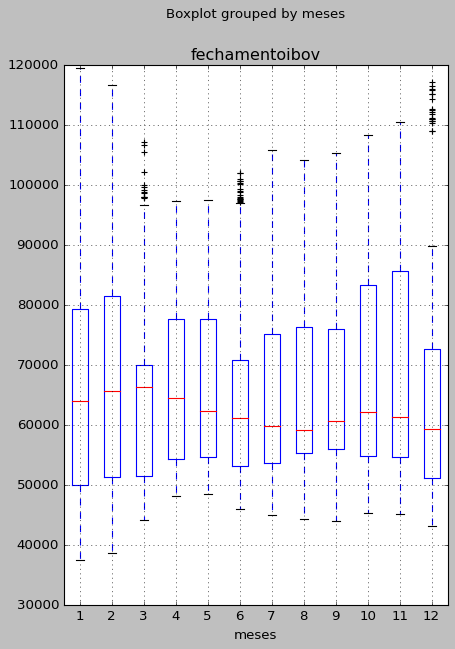

In [ ]:
dados.boxplot(figsize=(6, 9),column=['fechamentoibov'],by = 'meses')

In [ ]:
def plot_series(time, series, format="-", start=0, end=None, label = None):
    plt.plot(time[start:end], series[start:end], format, label = label)
    plt.xticks(fontsize = 16)
    plt.legend()
    plt.xlabel("Time")
    plt.yticks(fontsize = 16)
    plt.ylabel("Value")
    plt.grid(True)    

No handles with labels found to put in legend.


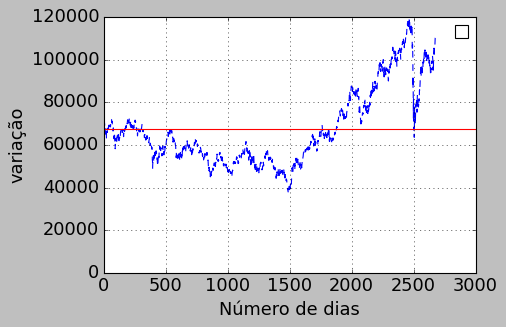

In [ ]:
plt.figure(figsize=(6, 4))
plot_series(np.linspace(1,len(dados),len(dados)),dados.fechamentoibov,'--')
plt.xlabel("Número de dias", fontsize = 16)
plt.ylabel("variação", fontsize = 16)
plt.ylim(-100,)
plt.axhline(y=dados.fechamentoibov.mean(), c = 'r')

In [ ]:
dados["fechamentoibov"].mean() # média simples

67433.37355248412

In [ ]:
dados["fechamentoibov"].std() # Retorna o desvio padrão da amostra sobre o eixo solicitado

18004.05074602625

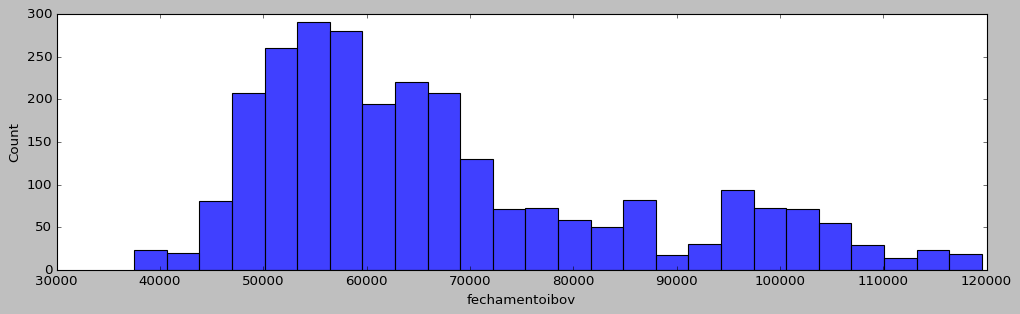

In [ ]:
plt.figure(figsize=(15,4))
sns.histplot(dados, x = "fechamentoibov")

Aplicando o teste de correlação

In [ ]:
dados.columns.values

array(['ano', 'meses', 'dia', 'fechamentoibov', 'aberturaibov', 'maxibov',
       'minibov', 'volibov', 'aberturausd', 'maxusd', 'minusd',
       'fechamentousd', 'volusd'], dtype=object)

In [ ]:
dadostestes = ['ano', 'meses', 'dia', 'fechamentoibov', 'aberturaibov', 'maxibov',
               'minibov', 'volibov', 'aberturausd', 'maxusd', 'minusd',
               'fechamentousd', 'volusd']
dadostestes = dados[dadostestes]

<Figure size 800x800 with 0 Axes>

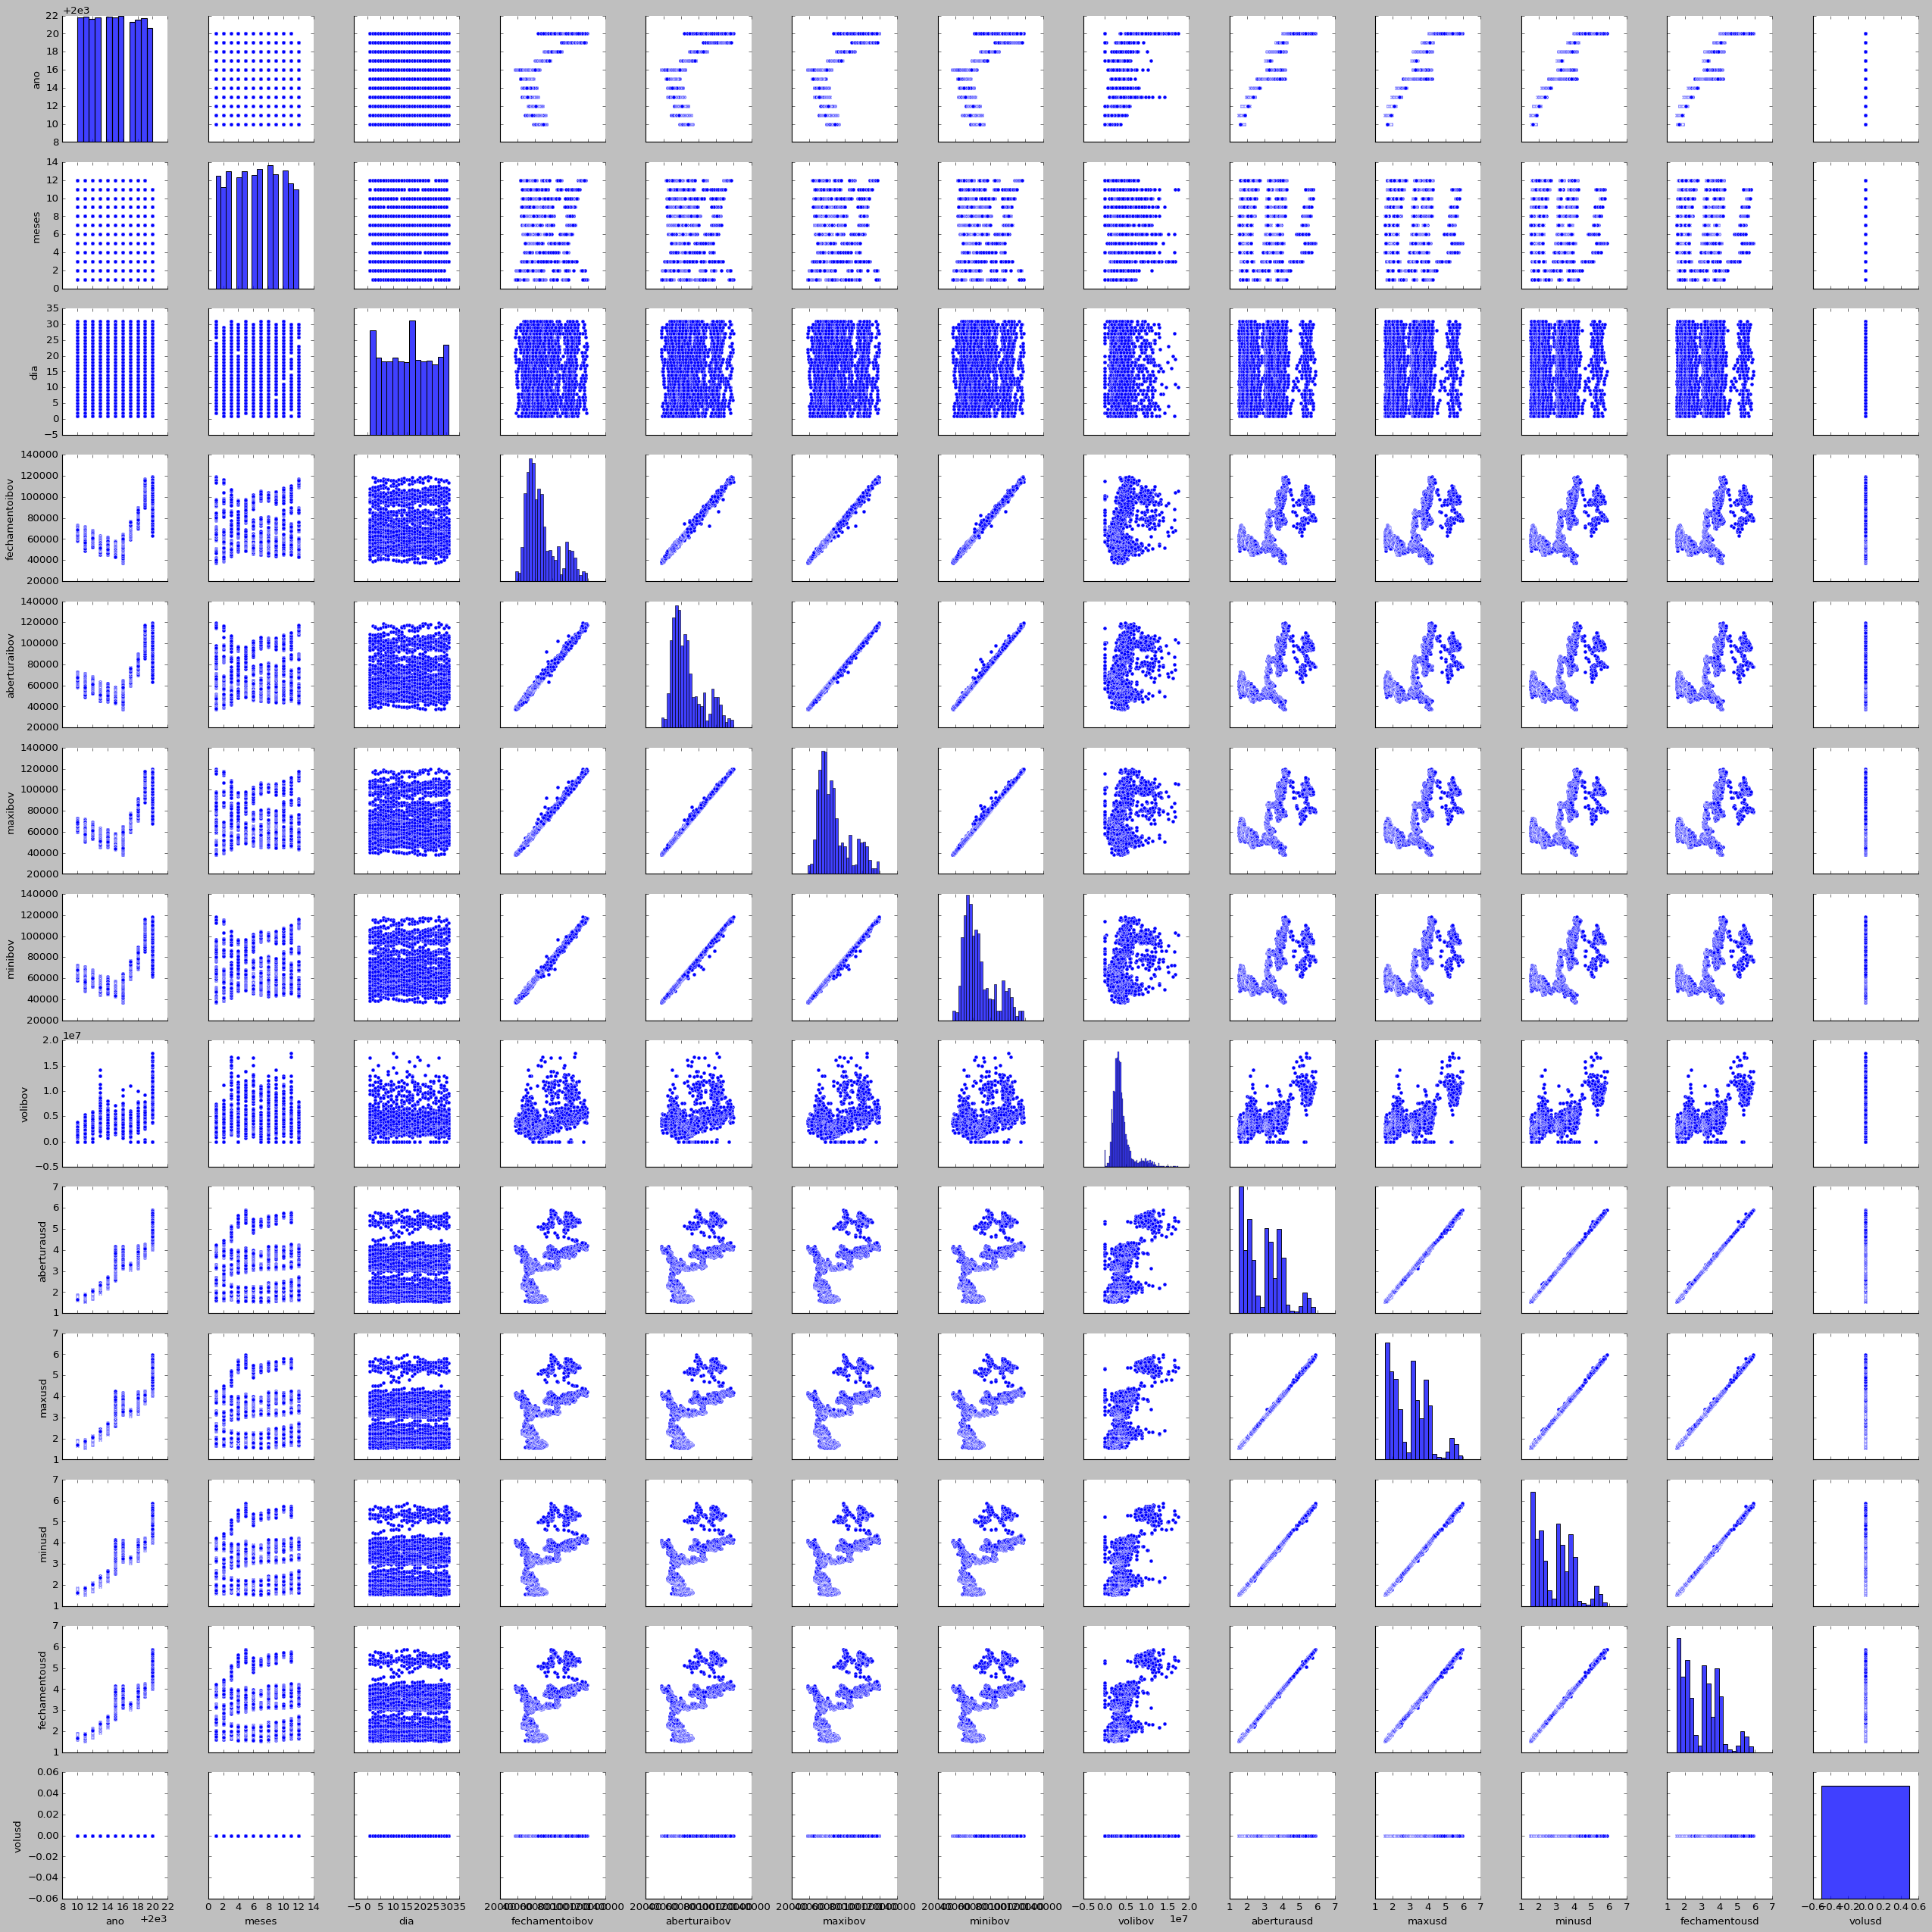

In [ ]:
plt.figure(figsize=(10, 10))
sns.pairplot(dadostestes)

In [ ]:
correlacao = dadostestes.corr()
correlacao

,ano,meses,dia,fechamentoibov,aberturaibov,maxibov,minibov,volibov,aberturausd,maxusd,minusd,fechamentousd,volusd
ano,1.000000,-0.024136,-0.000175,0.631836,0.630230,0.634460,0.627368,0.571078,0.927009,0.923919,0.928017,0.925195,NaN
meses,-0.024136,1.000000,-0.002728,0.018124,0.016265,0.016218,0.017999,0.028869,0.076080,0.075512,0.075279,0.075795,NaN
dia,-0.000175,-0.002728,1.000000,-0.001516,0.000285,-0.001192,0.000686,-0.043121,0.010332,0.010040,0.011318,0.010559,NaN
fechamentoibov,0.631836,0.018124,-0.001516,1.000000,0.996658,0.997521,0.997680,0.381522,0.565599,0.565952,0.568286,0.568761,NaN
aberturaibov,0.630230,0.016265,0.000285,0.996658,1.000000,0.999229,0.998810,0.381310,0.562622,0.563421,0.565652,0.565804,NaN
maxibov,0.634460,0.016218,-0.001192,0.997521,0.999229,1.000000,0.998816,0.393539,0.569021,0.569605,0.571748,0.572192,NaN
minibov,0.627368,0.017999,0.000686,0.997680,0.998810,0.998816,1.000000,0.369061,0.558415,0.558692,0.561269,0.561595,NaN
volibov,0.571078,0.028869,-0.043121,0.381522,0.381310,0.393539,0.369061,1.000000,0.658135,0.659166,0.654643,0.656744,NaN
aberturausd,0.927009,0.076080,0.010332,0.565599,0.562622,0.569021,0.558415,0.658135,1.000000,0.999723,0.999823,0.999833,NaN
maxusd,0.923919,0.075512,0.010040,0.565952,0.563421,0.569605,0.558692,0.659166,0.999723,1.000000,0.999743,0.999737,NaN


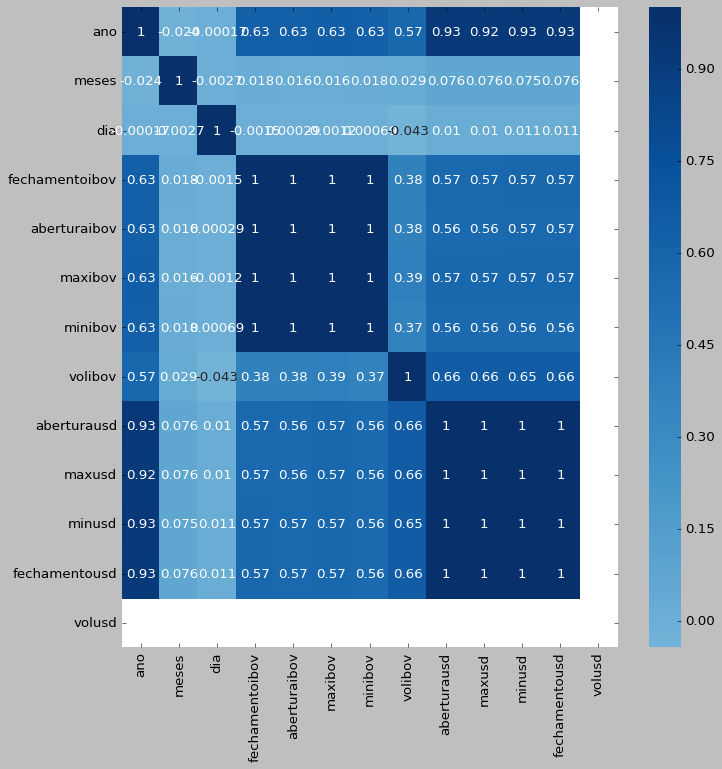

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlacao, cmap="Blues", center=0, annot=True)

Pela matriz de confusão podemos ver que os dados de abertura, máxima, mínima do IBOVESPA do pregão anterior possuí alta relação com o valor de fechamento do pregão seguinte a esses dados, vale lembrar também uma relação de 57% com os dados aber,min,max e fechamento com o preço do dólar do pregão anterior. Outro ponto interessante que pode gerar futuras análises podem ser a relação entre a abertura, min, max e fechamento do dolar com o ano. Além dessa análise, pode-se estudar futuramente a relação entre o ibov e o usd para o mesmo dia.

Normalizando os dados de fechamento

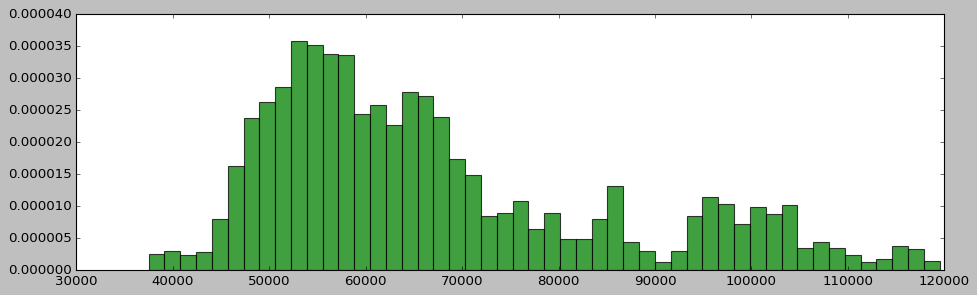

Média dos valores normalizados 10.94895396258699
Desvio Padrão dos valores normalizados 0.1305606513207432


In [ ]:
series = dados.fechamentoibov
plt.figure(figsize=(14,4))
plt.hist(series, 50, density=True, facecolor='g', alpha=0.75)
plt.show()
iteração = np.linspace(1,len(dados),len(dados))
percent_train = .7
divisao = int(percent_train*len(dados))
ln_series = np.log(series+1)
x_train = ln_series[:divisao]
xm = x_train.mean()
Sx = x_train.std()
print("Média dos valores normalizados", xm)
print("Desvio Padrão dos valores normalizados",Sx)
series = (ln_series - xm)/Sx

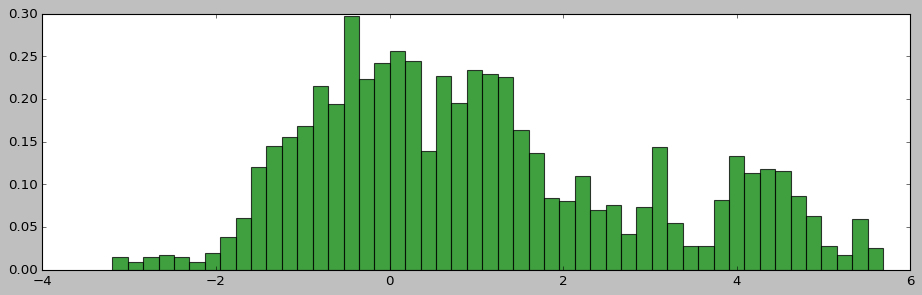

In [ ]:
plt.figure(figsize=(14,4))
plt.hist(series, 50, density=True, facecolor='g', alpha=0.75)
plt.show()

Organizando os dados

In [ ]:
dados.columns.values

array(['ano', 'meses', 'dia', 'fechamentoibov', 'aberturaibov', 'maxibov',
       'minibov', 'volibov', 'aberturausd', 'maxusd', 'minusd',
       'fechamentousd', 'volusd'], dtype=object)

In [ ]:
# para qualquer previsão futura se faz necessário usar a ordem dos dados especificada como critério de entrada
# pode-se notar pela correlação que os dados de abertura, máxima e mínima do pregão anterior possuem alta relação com o preço do fechamento do pregão seguinte
# por isso eles vão ser usados como critério de entrada, além disso as relações com o dólar que se provaram 56% de relação também vão ser consideradas.
entrada = ['aberturaibov', 'maxibov','minibov','aberturausd', 'maxusd', 'minusd','fechamentousd']
# saida = ['fechamentoibov']  já que normalizamos os dados de fechamento, então esses não vão ser usados
valor_entrada = dados[entrada]
#valor_saida = dados[saida]
valor_saida = series
# já que normalizamos os dados

In [ ]:
x = valor_entrada
y = valor_saida

Dividindo os dados

In [ ]:
from sklearn.model_selection import train_test_split
#qualquer valor
SEED = 0 

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.30, random_state=SEED)

Aplicando a árvore de decisão

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
def regressor_arvore(nivel):
    SEED= 0
    np.random.seed(SEED)
    partes = KFold(n_splits = 10, shuffle=True)
    modelo_arvore = DecisionTreeRegressor(max_depth=nivel)
    resultados = cross_validate(modelo_arvore, x, y, cv= partes, scoring="neg_mean_squared_error", return_train_score=True)
    print(f"Nivel {nivel} | Treino = {(resultados['train_score']*-1).mean()} | Teste = {(resultados['test_score']*-1).mean()}")
    treino.append((resultados['train_score']*-1).mean())
    teste.append((resultados['test_score']*-1).mean())

In [ ]:
iteracoes = []
treino = []
teste = []
for i in range(1,21):
    resultados = regressor_arvore(i)
    iteracoes.append(i)

Nivel 1 | Treino = 1.0447077196155585 | Teste = 1.0550896571132462
Nivel 2 | Treino = 0.3071628798652938 | Teste = 0.31365703272432255
Nivel 3 | Treino = 0.10273289188362895 | Teste = 0.10973987684091253
Nivel 4 | Treino = 0.03685116834640967 | Teste = 0.04397355436126145
Nivel 5 | Treino = 0.019547135537400055 | Teste = 0.026645801432911224
Nivel 6 | Treino = 0.014561351193318728 | Teste = 0.02329186038678981
Nivel 7 | Treino = 0.011741681171549159 | Teste = 0.023324233280375854
Nivel 8 | Treino = 0.009279727675667251 | Teste = 0.02535495208584071
Nivel 9 | Treino = 0.007004502645592098 | Teste = 0.02701362848715478
Nivel 10 | Treino = 0.005078136348552841 | Teste = 0.028747211145478485
Nivel 11 | Treino = 0.003486854779787208 | Teste = 0.029415695659520714
Nivel 12 | Treino = 0.0022706291631583125 | Teste = 0.03142401719353542
Nivel 13 | Treino = 0.0014294902402219429 | Teste = 0.031833244059041164
Nivel 14 | Treino = 0.0008558510698846959 | Teste = 0.0334456370548179
Nivel 15 | Trei

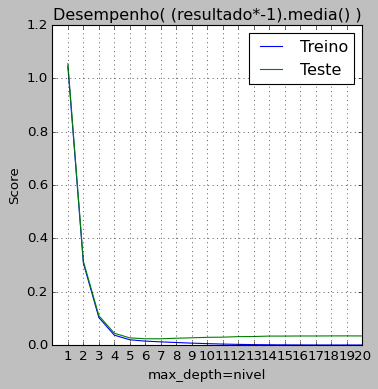

In [ ]:
plt.figure(figsize=(5,5))
plt.plot( iteracoes, treino, 'b-', color='blue', label = 'Treino')
plt.plot( iteracoes, teste, 'b-', color='green', label = 'Teste')
plt.title('Desempenho( (resultado*-1).media() )')
plt.xlabel('max_depth=nivel')
plt.ylabel('Score')
plt.legend()
plt.xticks(iteracoes)
plt.grid('True')
plt.show()

In [ ]:
def calcula_mse(resultados):
    media = (resultados["test_score"]*-1).mean()
    desvio_padrao = (resultados["test_score"]*-1).std()
    lim_inferior = media - (2*desvio_padrao)
    lim_superior = media + (2*desvio_padrao)
    print(f"Intervalo de confiança {lim_inferior} - {lim_superior}")

In [ ]:
SEED= 1232
np.random.seed(SEED)
partes = KFold(n_splits = 10, shuffle=True)
modelo_arvore = DecisionTreeRegressor(max_depth=5) # resgatar a melhor performance
modelo_arvore.fit(x_treino, y_treino) # aprende
predicoes = modelo_arvore.predict(x_teste) #prever
resultados = cross_validate(modelo_arvore, x, y, cv= partes, scoring="neg_mean_squared_error")
calcula_mse(resultados) # para encontrar o intervalo de confiança

Intervalo de confiança 0.017890547022148064 - 0.03567533185483143


NSE = 0.9923164074645955
MAE = 0.12445094397547878


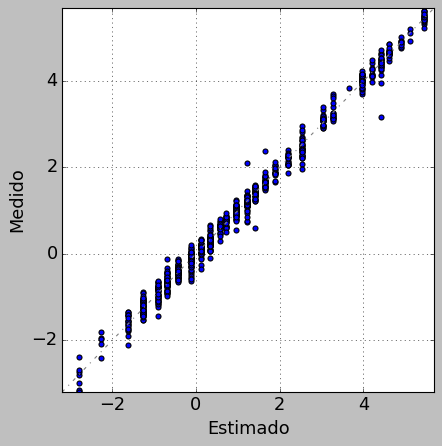

In [ ]:
#predicoes = predicoes.reshape(1404, 1)
Min = series.min()
Max = series.max()
plt.figure(figsize=(6,6))
plt.scatter(predicoes, y_teste)
plt.plot([Min,Max],[Min,Max],'-.', c = 'gray')
plt.ylim([Min,Max])
plt.xlim([Min,Max])
plt.xticks(fontsize = 16)
plt.xlabel("Estimado", fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel("Medido", fontsize = 16)
plt.grid(True)
def NSE(Yobs, Ysim):
  Yobs_m = np.mean(Yobs)
  s = np.sum((Yobs - Ysim)**2)
  i = np.sum((Yobs - Yobs_m)**2)
  return 1 - s/i
print('NSE =',NSE(y_teste, predicoes))
print('MAE =', tf.keras.metrics.mean_absolute_error(y_teste, predicoes).numpy())